In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1.

Implement a FA function in R/Python based on the PCA function you implemented in HW05. User can pass the dataset and specify the desired number of factors.


## (a)

Necessary outputs are:

- the loading matrix A;
- the factor matrix F;
- the communality vector of h2; 𝑖
- the uniqueness vector of 𝜓𝑖; and
- the vector of the proportions of total variance contributed by the ith factor.


### load dataset


In [69]:
cols = ['mpg', 'cylinders', 'displacement', 'horsepower',
        'weight', 'acceleration', 'model year', 'origin', 'car name']

c = pd.read_csv('auto-mpg.data.txt', header=None, sep='\s+', names=cols)

# deal with horsepower missing values
c = c[c['horsepower'] != '?']

# turn the horsepower type from object to float
c['horsepower'] = c['horsepower'].astype(float)

c.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


### Factor analysis


In [70]:
# Define the FA function
def fa(X, num_factors, isCorrMX=True):
    # Compute the correlation or covariance matrix
    if isCorrMX:
        corr_cov = np.corrcoef(X, rowvar=False)
    else:
        corr_cov = np.cov(X, rowvar=False)

    # Compute the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(corr_cov)

    # Sort eigenvalues in descending order and select the top num_factors eigenvectors
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx][:num_factors]
    eigenvectors = eigenvectors[:, idx][:, :num_factors]

    # Compute the loading matrix A
    loading_matrix = eigenvectors * np.sqrt(eigenvalues)

    # Compute the factor matrix F
    factor_matrix = np.dot(X, loading_matrix)

    # Compute the communality vector of h2
    h2 = np.sum(loading_matrix ** 2, axis=1)

    # Compute the uniqueness vector of psi
    psi = 1 - h2

    # Compute the vector of the proportions of total variance contributed by the ith factor
    var_prop = eigenvalues / np.sum(eigenvalues)

    return loading_matrix, factor_matrix, h2, psi, var_prop

## (b)

Apply your FA function to the AutoMPG dataset and generate the necessary outputs given 2 factors
are selected. Compare with the PCA results in HW05-EX3-b and discuss.


'Loading matrix'

,0,1
0,0.945818,0.186154
1,0.973437,0.148796
2,0.956162,-0.099948
3,0.931840,0.287618
4,-0.668684,0.737804


'Factor matrix'

,0,1
0,3687.854143,1050.842594
1,3939.629604,1107.733471
2,3654.988785,1030.184562
3,3637.896470,1027.976374
4,3642.300434,1032.173447
...,...,...
387,2811.695142,826.943830
388,2116.295612,640.756351
389,2346.329806,681.077723
390,2629.773701,779.424031


'the communality vector of h2'

,0
0,0.929225
1,0.969719
2,0.924236
3,0.951049
4,0.991493


'the uniqueness vector of 𝜓𝑖'

,0
0,0.070775
1,0.030281
2,0.075764
3,0.048951
4,0.008507


'Proportion of variance'

,0
0,0.854406
1,0.145594


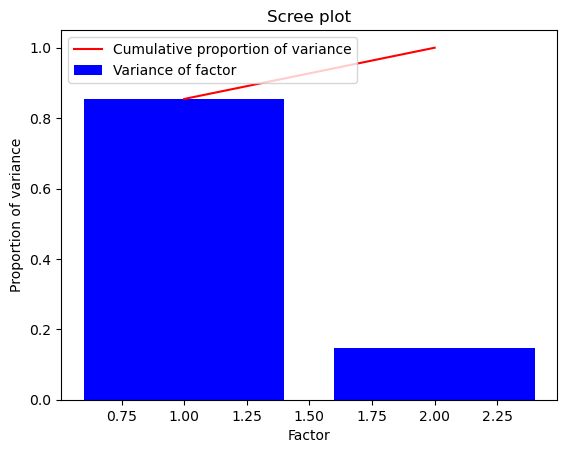

In [71]:
# Select the variables to include in the FA analysis
variables = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']

# Perform the FA analysis with 2 factors
A, F, h2, psi, var_prop = fa(c[variables].values, 2)

# Print the loading matrix, factor matrix, and variance proportions
display('Loading matrix',pd.DataFrame(A))
display('Factor matrix',pd.DataFrame(F))
display('the communality vector of h2',pd.DataFrame(h2))
display('the uniqueness vector of 𝜓𝑖',pd.DataFrame(psi))
display('Proportion of variance',pd.DataFrame(var_prop))

# Plot the scree plot
fig, ax = plt.subplots()
ax.bar(np.arange(1, len(var_prop)+1), var_prop,
       color='blue', label='Variance of factor')
ax.plot(np.arange(1, len(var_prop)+1), np.cumsum(var_prop),
        color='red', label='Cumulative proportion of variance')
ax.set_xlabel('Factor')
ax.set_ylabel('Proportion of variance')
ax.set_title('Scree plot')
plt.legend()
plt.show()



兩種方法的目的不同

- pca: 用於降低維度。使用原特徵做線性組合後得到的新特徵可以擁有最大的變異量，即用少量的主成份表示原始數據的變異性
- Factor analysis: 主要目標是識別數據中的潛在因素，並且假定這些因素是導致數據相關性的原因

產生的結果也不相同，如 loading matrix etc


# 2.

Transpose the ORL face dataset to let 𝐗 be a 2576 × 400 data matrix. Perform the factor analysis on 𝐗 with
the FA function of your implementation in EX1.


## (a)

How many factors are needed to explain 50%, 60%, 70%, 80%, and 90% of the total variance?


### load dataset


In [72]:
import os
from PIL.Image import open

try:
    path_ = os.getcwd()+'/ORL Faces'
except:
    print('Set path_ to your ORL Faces fold directory')

In [73]:
df = pd.DataFrame()

for people in range(1, 41):
    for order in range(1, 11):
        im = open(path_+'/'+str(people)+'_'+str(order)+'.png')
        ar = pd.DataFrame(np.mat(np.asarray(im)).flatten(), columns=[
                          r for r in range(1, 2577)], index=[(people-1)*10+order])
        df = pd.concat([df, ar], axis=0)
    # print(df)
df = df.T
df

,1,2,3,4,5,6,7,8,9,10,...,391,392,393,394,395,396,397,398,399,400
1,88,87,92,92,83,93,94,94,65,89,...,121,128,129,127,127,124,128,122,120,124
2,88,90,92,96,75,90,96,90,79,89,...,122,128,127,125,127,124,128,123,119,125
3,90,95,88,93,88,97,99,93,88,92,...,121,128,127,126,128,125,128,124,121,125
4,91,96,98,94,91,97,98,90,100,96,...,121,128,127,126,129,123,128,124,119,125
5,91,92,104,99,101,92,96,98,86,87,...,123,128,127,126,128,124,129,123,120,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2572,145,132,169,166,134,186,182,190,189,169,...,35,90,90,36,88,37,91,36,77,36
2573,141,124,170,161,173,182,177,183,191,175,...,37,90,91,36,89,38,91,37,95,33
2574,138,124,165,157,167,100,144,190,182,190,...,37,89,91,37,88,39,91,38,95,33
2575,142,120,146,79,176,56,74,189,169,185,...,36,90,91,36,88,38,92,40,92,34


### explan (percentage) of the total variance


In [74]:
A, F, h2, psi, var_prop = fa(df, num_factors=len(df.columns))

# Calculate cumulative proportion of variance explained
cumulative_prop = np.cumsum(var_prop)

# Find the index of the first element in cumulative_prop that exceeds each percentage
fifty_idx = np.argmax(cumulative_prop > 0.5)
sixty_idx = np.argmax(cumulative_prop > 0.6)
seventy_idx = np.argmax(cumulative_prop > 0.7)
eighty_idx = np.argmax(cumulative_prop > 0.8)
ninety_idx = np.argmax(cumulative_prop > 0.9)

# Print the number of factors needed for each percentage
print(f"50% of variance explained with {fifty_idx+1} factors")
print(f"60% of variance explained with {sixty_idx+1} factors")
print(f"70% of variance explained with {seventy_idx+1} factors")
print(f"80% of variance explained with {eighty_idx+1} factors")
print(f"90% of variance explained with {ninety_idx+1} factors")

50% of variance explained with 2 factors
60% of variance explained with 4 factors
70% of variance explained with 7 factors
80% of variance explained with 17 factors
90% of variance explained with 50 factors


## (b)

On condition of explaining 80% of the total variance, rescale the first factor into the range [0, 255].
Reshape the 2576 × 1 first factor into a 46 × 56 matrix. Plot an image from the 46 × 56 matrix using the rescaled factor.


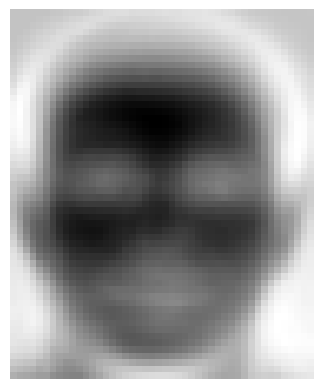

In [75]:
# Rescale the first factor to the range [0, 255]
factor_1 = F[:, 0]
rescaled_factor_1 = (factor_1 - np.min(factor_1)) / \
    (np.max(factor_1) - np.min(factor_1)) * 255

# Reshape the rescaled factor into a 46 x 56 matrix
factor_1_matrix = rescaled_factor_1.reshape((56, 46))

# Plot the image
plt.imshow(factor_1_matrix, cmap='gray')
plt.axis('off')
plt.show()

# 3.

Find a package/library to perform PLSR on the AutoMPG dataset. Take 300 cars “randomly” to build the model and the rest of 92 cars to test.


## (a)

Start with a single 𝑦 (=mpg). What do you observe with the testing results?


In [76]:
import pandas as pd
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import r2_score

# delete categories
c = c.drop(['car name'], axis=1)

# Extract relevant columns and select 300 cars randomly to build the model
train_data = c.sample(n=300, random_state=123)
test_data = c.drop(train_data.index)

# Fit PLSR model with "mpg" as the response variable
pls_model = PLSRegression(n_components=3)
pls_model.fit(train_data.drop("mpg", axis=1), train_data["mpg"])

# Make predictions on the test data and calculate R-squared value
test_pred = pls_model.predict(test_data.drop("mpg", axis=1))
rsq = r2_score(test_data["mpg"], test_pred)
print("R-squared value:", rsq)

R-squared value: 0.8091505403937987


依變量為'mpg'，將 n_components 設為 3，使用 package PLSRegression 建立 model，測出之 r-square 約略為 0.8


## (b)

Use 𝑦 = [mpg model year]. What do you observe with the testing results? In particular, compare
and discuss the testing results of the mpg between (a) and (b).


In [77]:
X_train = train_data.drop(['mpg', 'model year'], axis=1)
y_train = train_data[['mpg', 'model year']]

# model
pls_model = PLSRegression(n_components=3)
pls_model.fit(X_train, y_train)

# prediction
X_test = test_data.drop(['mpg', 'model year'], axis=1)
y_test = test_data[['mpg', 'model year']]
test_pred = pls_model.predict(X_test)

# R-squared
rsq_mpg = np.corrcoef(y_test["mpg"], test_pred[:, 0], rowvar=False)[0, 1]**2
rsq_year = np.corrcoef(y_test["model year"],
                       test_pred[:, 1], rowvar=False)[0, 1]**2
print("R-squared value (mpg):", rsq_mpg)
print("R-squared value (model year):", rsq_year)

R-squared value (mpg): 0.7112589741043394
R-squared value (model year): 0.1968429366723553


增加預測因子 model_year 後，反而使得 mpg 的 r_squared 降低，表示“model year“作為預測因子並不能帶來正向效益，所以在選擇因子時可以傾向不選擇 model year
